# PUI midterm

## Part 1: Multiple choice and theoretic questions (20 pts total, 5 pts each question)
Please write your answer after each question

### Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies):
A) sample averages are at least 4% different

B) sample averages are the same

C) sample averages are different

D) one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or 95% confidence) singe p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

ANSW:  C, D

H0 (Null Hypothesis): sample 1 avg = sample 2 avg
H1 (Alternative Hypothesis): sample 1 avg != sample 2 avg

t-test is a statistical test to find the evidence of significant difference between 2 samples. With the given p-value of 0.04, one can reject the null hypothesis (sample 1 avg = sample 2 avg) at 5% significance level.(Option D)
So, when we reject the null hypothesis that the samples have same mean, we can say that the sample averages are different (option C)

p-value represents the larger the absolute value of the t-value, the smaller the p-value, and the greater the evidence against the null hypothesis. A p-value is the probability that the results from your sample data occurred by chance. It measures the 

### Question 2. What is true regarding normal and log-normal distributions:
A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follow a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

ANSWER: B, D

Option B: Outlier is a point which does not follow common patterns and generally resides at the end of the distributions. When we take a log of a big number, it's magnitude gets dampen and it becomes easy to plot on the graph. Log transformation is used to correct the data distributions. So in normally distributed data, the outliers fall away from the mean, but in log normally distributed variables, the range of the data variables change making it closer to mean.

Option D: based on the log-normal distribution equation, taking log of log-normal distribution returns normal.

### Question 3. 
Imagine training a model which considers multiple sattelite images of urban traffic and tries to find groups of typical
(repeated with minor deviations) scenarios. How would you classify this problem from Machine Learning perspective?

A) Supervised leanring;

B) Unsupervised learning;

C) Semi-supervised learning;

D) Reinforcement learning.

Explain you choice:

Answer: B

- Because imagary data is unlabelled data, which is used in training unsupervised learning. And, data clustering can be used to identify typical traffic patterns. Data clustering is the process of organizing objects into groups whose members are similar in some way.

### Question 4. 
Please explain why would you need separate training, validation and test samples to learn the model. In which cases you may need all three, including a validation sample?

- We need seperate raining, validation and test samples to learn the model to avoid overfitting and accurately evaluate your model. 
Training Data: This dataset which is used for model building. ML model learns the complex pattern based on train data.
Validation Data: This sample of dataset is used for the model tuning. A sample of training data (20%-30%) is kept aside during model buildig and then used for model hyperparameters tuning. It is used for unbiased evaluation of the model.
Test Data: This dataset is useen data which is used for model evaluation. Test data helps to evaluate the model performance of the unseen data.

We need all the three datasets during supervised modeling with hyperparameters.
e.g. when we build tree based models which have hyperparameters such as tree length, node size, we can use:
1. Train data for model building
2. Validation data for hyperparameter tuining to make model performance better
3. Test data as unseen data to check model performance 

In [350]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Part 2: NYPD data analysis (80 pts)

In this part, you'll use New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing

Data dictionary: https://data.cityofnewyork.us/api/views/qgea-i56i/files/b21ec89f-4d7b-494e-b2e9-f69ae7f4c228?download=true&filename=NYPD_Complaint_Incident_Level_Data_Footnotes.pdf

### read data

In [351]:
data = pd.read_csv('/home/jovyan/shared/Data/NYPD_data.csv')
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118.0,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113.0,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578.0,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126.0,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101.0,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


In [352]:
data.shape

(653075, 35)

In [353]:
data.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARRASSMENT 2',
       'MISCELLANEOUS PENAL LAW', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'BURGLARY', 'DANGEROUS DRUGS', 'PETIT LARCENY',
       'OFF. AGNST PUB ORD SENSBLTY &', 'GRAND LARCENY', 'FELONY ASSAULT',
       'ASSAULT 3 & RELATED OFFENSES', 'ARSON', 'RAPE', 'SEX CRIMES',
       'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
       'CRIMINAL MISCHIEF & RELATED OF', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING',
       'ESCAPE 3', 'NYS LAWS-UNCLASSIFIED FELONY',
       'POSSESSION OF STOLEN PROPERTY', 'THEFT OF SERVICES',
       'KIDNAPPING & RELATED OFFENSES', 'OTHER OFFENSES RELATED TO THEF',
       'UNAUTHORIZED USE OF A VEHICLE', "BURGLAR'S TOOLS",
       'ENDAN WELFARE INCOMP', 'FRAUDULENT ACCOSTING',
       'AGRICULTURE & MRKTS LA

In [354]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

The complete data dictionary link is provided above. The focus of this notebook would be on columns - 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude'.

The 'CMPLNT_NUM' is a unique id for each complaint, 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively, 'OFNS_DESC' is the type of offence reported, 'BORO_NM' is name of borough where complaint was reported, 'PARKS_NM' is name of park where complaint recorded (if any) and 'Latitude', 'Longitude' are location of complaint.


## Section 1 - Data cleaning tasks (12 pts, 3 pts each part)
1. Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
2. Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
3. Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
4. Filter by area (drop rows with location outside NYC)

### 1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [355]:
complaint_data= data[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude']]

In [356]:
complaint_data['Date_Time']=complaint_data['CMPLNT_FR_DT'] + '  ' + complaint_data['CMPLNT_FR_TM']
# make sure to convert date column to datetime
complaint_data['CMPLNT_FR_DT']=pd.to_datetime(complaint_data['CMPLNT_FR_DT'],errors='coerce')
complaint_data['Date_Time']=pd.to_datetime(complaint_data['Date_Time'],errors='coerce')

#extract date, year, day of the week and hour 
complaint_data['Date'] = complaint_data['CMPLNT_FR_DT'].dt.date
complaint_data['Month'] = complaint_data['CMPLNT_FR_DT'].dt.month
complaint_data['Year'] = complaint_data['CMPLNT_FR_DT'].dt.year
complaint_data['DOW'] = complaint_data['CMPLNT_FR_DT'].dt.dayofweek
complaint_data['Hour'] = complaint_data['Date_Time'].dt.hour

In [357]:
complaint_data.isnull().sum()

CMPLNT_NUM           0
CMPLNT_FR_DT        34
CMPLNT_FR_TM         4
OFNS_DESC          476
BORO_NM            993
PARKS_NM        647932
Latitude          2316
Longitude         2317
Date_Time           34
Date                34
Month               34
Year                34
DOW                 34
Hour                34
dtype: int64

In [358]:
complaint_data.shape

(653075, 14)

In [359]:
#Lets filter out missing/wrong date and times 
complaint_data1 = complaint_data.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'Date_Time'])
complaint_data1

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,Date_Time,Date,Month,Year,DOW,Hour
0,394506329,2019-12-31,17:30:00,DANGEROUS WEAPONS,MANHATTAN,NaN,40.820927,-73.943324,2019-12-31 17:30:00,2019-12-31,12.0,2019.0,1.0,17.0
1,968873685,2019-12-29,16:31:00,FORGERY,BRONX,NaN,40.885701,-73.861640,2019-12-29 16:31:00,2019-12-29,12.0,2019.0,6.0,16.0
2,509837549,2019-12-15,18:45:00,HARRASSMENT 2,QUEENS,NaN,40.742281,-73.819824,2019-12-15 18:45:00,2019-12-15,12.0,2019.0,6.0,18.0
3,352454313,2019-12-28,01:00:00,MISCELLANEOUS PENAL LAW,BRONX,NaN,40.875311,-73.847545,2019-12-28 01:00:00,2019-12-28,12.0,2019.0,5.0,1.0
4,248803469,2008-09-05,21:41:00,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,40.698827,-73.938819,2008-09-05 21:41:00,2008-09-05,9.0,2008.0,4.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653066,509395429,2013-09-22,00:19:00,ROBBERY,MANHATTAN,NaN,40.712918619,-73.995788,2013-09-22 00:19:00,2013-09-22,9.0,2013.0,6.0,0.0
653067,227239192,2015-03-22,10:40:00,OFFENSES AGAINST PUBLIC ADMINI,BRONX,NaN,40.791151867,-73.884372,2015-03-22 10:40:00,2015-03-22,3.0,2015.0,6.0,10.0
653068,917703992,2016-04-16,18:00:00,MISCELLANEOUS PENAL LAW,STATEN ISLAND,NaN,40.616972923,-74.069908,2016-04-16 18:00:00,2016-04-16,4.0,2016.0,5.0,18.0
653069,756227431,2015-07-20,07:19:00,OFF. AGNST PUB ORD SENSBLTY &,BROOKLYN,NaN,40.675960336,-74.003351,2015-07-20 07:19:00,2015-07-20,7.0,2015.0,0.0,7.0


In [360]:
#let's check out date where year<1900 or >2000 , Also where month is <1 or >12
complaint_data1.loc[(complaint_data1['Year'] > 2021) | (complaint_data1['Year'] <1900)]
#This shows there are no outliers

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,Date_Time,Date,Month,Year,DOW,Hour


In [361]:
#let's check out date where hour <0 or >23 
complaint_data1.loc[(complaint_data1['Hour'] > 23) | (complaint_data1['Hour'] < 0)]
#This shows there are no outliers

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,Date_Time,Date,Month,Year,DOW,Hour


In [362]:
complaint_data1.shape

(653041, 14)

In [363]:
#b) missing borough name
complaint_data1= complaint_data1.dropna(subset=['BORO_NM'])
complaint_data1.shape

(652052, 14)

In [364]:
#c) duplicate complaint number ('CMPLNT_NUM' column)
complaint_data1=complaint_data1.drop_duplicates(subset=['CMPLNT_NUM'])
complaint_data1.shape

(651981, 14)

### 2. Remove rows where location is parks or greenspace and keep data for 2019 and after

In [365]:
complaint_data1.PARKS_NM.unique()

array([nan, 'GRAND ARMY PLAZA BROOKLYN', 'SUNSET PARK',
       'HAPPY WARRIOR PLAYGROUND', 'POE PARK', 'BRYANT PARK',
       'HUDSON RIVER PARK', 'CITY HALL PARK', 'SARA D. ROOSEVELT PARK',
       'BELT PARKWAY/SHORE PARKWAY', 'HIGHBRIDGE PARK MANHATTAN SIDE',
       'ASTORIA PARK', 'QUEENSBRIDGE PARK', 'KISSENA PARK',
       'FLUSHING MEADOWS CORONA PARK', 'MCCARREN PARK',
       'HOLCOMBE RUCKER PARK', 'CONFERENCE HOUSE PARK',
       'MARCUS GARVEY PARK', 'CENTRAL PARK', 'VAN CORTLANDT PARK',
       'HARLEM RIVER PARK', 'CALLAHAN-KELLY PLAYGROUND',
       'RICHMAN (ECHO) PARK', 'FORT TRYON PARK', 'UNION SQUARE PARK',
       'WASHINGTON SQUARE PARK', 'ST. VARTAN PARK', 'EAST RIVER PARK',
       'PELHAM PARKWAY', 'SIMEONE PARK', 'RUFUS KING PARK',
       'MACOMBS DAM PARK', 'CLAREMONT PARK', 'FORT GREENE PARK',
       'COFFEY PARK', 'TRINITY PARK', 'MARIA HERNANDEZ PARK',
       'RIVERSIDE PARK SOUTH', "FRANK D. O'CONNOR PLAYGROUND",
       'EQUITY PARK', 'LILLIAN D WALD PLAYGROUND', '

In [366]:
# parks name is in 'PARKS_NM' column. If a crime has occured outside a parkspace, this value would be NaN

#ASSUMPTION - Remove entries containing 'parks','PARKS','green' , 'PLAYGROUND','GROUND'

complaint_datax= complaint_data1[~(complaint_data1['PARKS_NM'].str.contains('PARK') == True)]
complaint_datax= complaint_datax[~(complaint_datax['PARKS_NM'].str.contains('PLAYGROUND') == True)]               
complaint_datax= complaint_datax[~(complaint_datax['PARKS_NM'].str.contains('GARDEN') == True)]
complaint_datax=complaint_datax[~(complaint_datax['PARKS_NM'].str.contains('WOODS') == True)]
complaint_datax=complaint_datax[~(complaint_datax['PARKS_NM'].str.contains('GROUND') == True)]
complaint_datax=complaint_datax[~(complaint_datax['PARKS_NM'].str.contains('PLAZA') == True)]
complaint_datax=complaint_datax[~(complaint_datax['PARKS_NM'].str.contains('RECREATION') == True)]
complaint_data2=complaint_datax[~(complaint_datax['PARKS_NM'].str.contains('FIELDS') == True)]
complaint_data2.shape

(647346, 14)

In [367]:
## check the timeline of data
max_date=complaint_data2.Date_Time.max()
min_date=complaint_data2.Date_Time.min()
print('Timeline of the data shows, records are from {a} to {b}'.format(a= max_date, b= min_date))

Timeline of the data shows, records are from 2020-11-20 17:25:00 to 1911-12-20 13:38:00


In [368]:
# remove data <2019
complaint_data2= complaint_data2.loc[complaint_data2['Year'] >= 2019 ]
complaint_data2.Year.unique()

array([2019., 2020.])

In [369]:
complaint_data2.shape

(447228, 14)

### 3. keep type 1 crimes as defined by FBI from the data : 
https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"

In [370]:
complaint_data2

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,Date_Time,Date,Month,Year,DOW,Hour
0,394506329,2019-12-31,17:30:00,DANGEROUS WEAPONS,MANHATTAN,NaN,40.820927,-73.943324,2019-12-31 17:30:00,2019-12-31,12.0,2019.0,1.0,17.0
1,968873685,2019-12-29,16:31:00,FORGERY,BRONX,NaN,40.885701,-73.861640,2019-12-29 16:31:00,2019-12-29,12.0,2019.0,6.0,16.0
2,509837549,2019-12-15,18:45:00,HARRASSMENT 2,QUEENS,NaN,40.742281,-73.819824,2019-12-15 18:45:00,2019-12-15,12.0,2019.0,6.0,18.0
3,352454313,2019-12-28,01:00:00,MISCELLANEOUS PENAL LAW,BRONX,NaN,40.875311,-73.847545,2019-12-28 01:00:00,2019-12-28,12.0,2019.0,5.0,1.0
5,293718737,2019-12-27,22:00:00,BURGLARY,MANHATTAN,NaN,40.720759,-73.980466,2019-12-27 22:00:00,2019-12-27,12.0,2019.0,4.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462069,187541348,2019-01-03,12:09:00,FORGERY,QUEENS,NaN,40.756568,-73.875932,2019-01-03 12:09:00,2019-01-03,1.0,2019.0,3.0,12.0
462071,191649403,2019-01-05,13:20:00,PETIT LARCENY,QUEENS,NaN,40.699743,-73.911424,2019-01-05 13:20:00,2019-01-05,1.0,2019.0,5.0,13.0
462072,158561764,2019-01-04,21:00:00,HARRASSMENT 2,BROOKLYN,NaN,40.645701,-73.932662,2019-01-04 21:00:00,2019-01-04,1.0,2019.0,4.0,21.0
462073,484205159,2019-01-03,19:00:00,PETIT LARCENY,MANHATTAN,NaN,40.72981,-73.991097,2019-01-03 19:00:00,2019-01-03,1.0,2019.0,3.0,19.0


In [371]:
type_1_crime = ['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']
complaint_data3= complaint_data2.loc[complaint_data2['OFNS_DESC'].isin(type_1_crime)]                                   
complaint_data3

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,Date_Time,Date,Month,Year,DOW,Hour
5,293718737,2019-12-27,22:00:00,BURGLARY,MANHATTAN,NaN,40.720759,-73.980466,2019-12-27 22:00:00,2019-12-27,12.0,2019.0,4.0,22.0
10,585574881,2019-12-24,16:00:00,GRAND LARCENY,MANHATTAN,NaN,40.750431,-73.989282,2019-12-24 16:00:00,2019-12-24,12.0,2019.0,1.0,16.0
14,249276017,2019-12-20,14:00:00,FELONY ASSAULT,BRONX,NaN,40.822271,-73.911698,2019-12-20 14:00:00,2019-12-20,12.0,2019.0,4.0,14.0
16,183266811,2019-12-20,01:35:00,BURGLARY,BROOKLYN,NaN,40.632545,-73.981951,2019-12-20 01:35:00,2019-12-20,12.0,2019.0,4.0,1.0
18,431547413,2019-12-10,20:06:00,ARSON,MANHATTAN,NaN,40.711952,-73.989855,2019-12-10 20:06:00,2019-12-10,12.0,2019.0,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462045,864698738,2019-01-05,21:18:00,FELONY ASSAULT,BRONX,NaN,40.825012,-73.914133,2019-01-05 21:18:00,2019-01-05,1.0,2019.0,5.0,21.0
462056,334524240,2019-01-04,18:19:00,GRAND LARCENY,STATEN ISLAND,NaN,40.560329,-74.163770,2019-01-04 18:19:00,2019-01-04,1.0,2019.0,4.0,18.0
462061,181896226,2019-01-03,21:35:00,ROBBERY,BROOKLYN,NaN,40.687653,-73.916852,2019-01-03 21:35:00,2019-01-03,1.0,2019.0,3.0,21.0
462063,377133908,2019-01-01,04:00:00,GRAND LARCENY,BROOKLYN,NaN,40.720082,-73.962790,2019-01-01 04:00:00,2019-01-01,1.0,2019.0,1.0,4.0


In [372]:
complaint_data3.BORO_NM.unique()

array(['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

### 4. keep rows with location within NYC

zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". You can also download the shapefile here: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true .

Do a spatial joint to keep only rows within NYC

In [373]:
## zip codes map
# zips = gpd.read_file('Data/ZIPCODE/ZIP_CODE_040114.shp')
zips = gpd.read_file('/home/jovyan/shared/Data/ZIP_CODE/ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


Note: 'ZIPCODE' column has unique codes. The borough name is given in 'COUNTY' column. The counties and boroughs are synonymous in NYC. 'New York' county corresponds to Manhattan, 'Kings' to Brooklyn, 'Richmond' to Staten Island

In [374]:
zips.COUNTY.unique()

array(['Queens', 'Kings', 'Bronx', 'New York', 'Richmond'], dtype=object)

In [375]:
zips.shape

(263, 13)

In [376]:
zips = zips.drop_duplicates(subset=['ZIPCODE','PO_NAME','POPULATION','COUNTY','CTY_FIPS'])
zips.shape

(251, 13)

<AxesSubplot:>

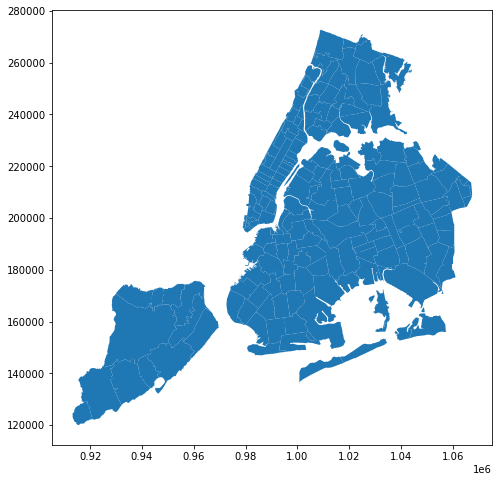

In [377]:
zips.plot(figsize=(8,8))

In [378]:
zips = zips.to_crs({'init': 'epsg:4326'})
zips.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [379]:
zips_1= zips.copy()

In [380]:
c_gdf= gpd.GeoDataFrame(complaint_data3,crs={'init': 'epsg:4326'}, geometry=gpd.points_from_xy(complaint_data3.Longitude, complaint_data3.Latitude))

In [381]:
c_gdf

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,Date_Time,Date,Month,Year,DOW,Hour,geometry
5,293718737,2019-12-27,22:00:00,BURGLARY,MANHATTAN,NaN,40.720759,-73.980466,2019-12-27 22:00:00,2019-12-27,12.0,2019.0,4.0,22.0,POINT (-73.98047 40.72076)
10,585574881,2019-12-24,16:00:00,GRAND LARCENY,MANHATTAN,NaN,40.750431,-73.989282,2019-12-24 16:00:00,2019-12-24,12.0,2019.0,1.0,16.0,POINT (-73.98928 40.75043)
14,249276017,2019-12-20,14:00:00,FELONY ASSAULT,BRONX,NaN,40.822271,-73.911698,2019-12-20 14:00:00,2019-12-20,12.0,2019.0,4.0,14.0,POINT (-73.91170 40.82227)
16,183266811,2019-12-20,01:35:00,BURGLARY,BROOKLYN,NaN,40.632545,-73.981951,2019-12-20 01:35:00,2019-12-20,12.0,2019.0,4.0,1.0,POINT (-73.98195 40.63254)
18,431547413,2019-12-10,20:06:00,ARSON,MANHATTAN,NaN,40.711952,-73.989855,2019-12-10 20:06:00,2019-12-10,12.0,2019.0,1.0,20.0,POINT (-73.98985 40.71195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462045,864698738,2019-01-05,21:18:00,FELONY ASSAULT,BRONX,NaN,40.825012,-73.914133,2019-01-05 21:18:00,2019-01-05,1.0,2019.0,5.0,21.0,POINT (-73.91413 40.82501)
462056,334524240,2019-01-04,18:19:00,GRAND LARCENY,STATEN ISLAND,NaN,40.560329,-74.163770,2019-01-04 18:19:00,2019-01-04,1.0,2019.0,4.0,18.0,POINT (-74.16377 40.56033)
462061,181896226,2019-01-03,21:35:00,ROBBERY,BROOKLYN,NaN,40.687653,-73.916852,2019-01-03 21:35:00,2019-01-03,1.0,2019.0,3.0,21.0,POINT (-73.91685 40.68765)
462063,377133908,2019-01-01,04:00:00,GRAND LARCENY,BROOKLYN,NaN,40.720082,-73.962790,2019-01-01 04:00:00,2019-01-01,1.0,2019.0,1.0,4.0,POINT (-73.96279 40.72008)


In [382]:
c_spatial = gpd.sjoin(c_gdf, zips, op='within', lsuffix='left')

In [383]:
c_spatial

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,Date_Time,Date,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
5,293718737,2019-12-27,22:00:00,BURGLARY,MANHATTAN,NaN,40.720759,-73.980466,2019-12-27 22:00:00,2019-12-27,...,New York,61455.0,1.590352e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
227,259948697,2019-10-12,00:01:00,GRAND LARCENY,MANHATTAN,NaN,40.722027,-73.983446,2019-10-12 00:01:00,2019-10-12,...,New York,61455.0,1.590352e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
1116,533911393,2019-11-19,00:01:00,GRAND LARCENY,MANHATTAN,NaN,40.720813,-73.978136,2019-11-19 00:01:00,2019-11-19,...,New York,61455.0,1.590352e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
1977,922019659,2019-12-26,01:00:00,GRAND LARCENY OF MOTOR VEHICLE,MANHATTAN,NaN,40.728316,-73.983333,2019-12-26 01:00:00,2019-12-26,...,New York,61455.0,1.590352e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
1996,405855157,2019-12-31,18:15:00,FELONY ASSAULT,MANHATTAN,NaN,40.723997,-73.975815,2019-12-31 18:15:00,2019-12-31,...,New York,61455.0,1.590352e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101996,505910328,2019-10-13,01:52:00,ARSON,BRONX,NaN,40.886721,-73.815284,2019-10-13 01:52:00,2019-10-13,...,Bronx,4438.0,7.625748e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
119481,574414703,2019-08-31,15:00:00,GRAND LARCENY,BRONX,NaN,40.865623,-73.801091,2019-08-31 15:00:00,2019-08-31,...,Bronx,4438.0,7.625748e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
167810,644827635,2019-08-25,17:30:00,FELONY ASSAULT,BRONX,NaN,40.866326,-73.806150,2019-08-25 17:30:00,2019-08-25,...,Bronx,4438.0,7.625748e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
246910,435666381,2019-06-22,10:26:00,GRAND LARCENY,BRONX,NaN,40.866326,-73.806150,2019-06-22 10:26:00,2019-06-22,...,Bronx,4438.0,7.625748e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0


In [384]:
#NYC lat long:
#West -74.257159 East -73.699215
#North 40.915568 South 40.495992
c_spatial.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM',
       'PARKS_NM', 'Latitude', 'Longitude', 'Date_Time', 'Date', 'Month',
       'Year', 'DOW', 'Hour', 'geometry', 'index_right', 'ZIPCODE', 'BLDGZIP',
       'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS',
       'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN'],
      dtype='object')

In [385]:
c_spatial= c_spatial.drop_duplicates(subset=['CMPLNT_NUM'])
c_spatial.shape

(91401, 28)

<AxesSubplot:>

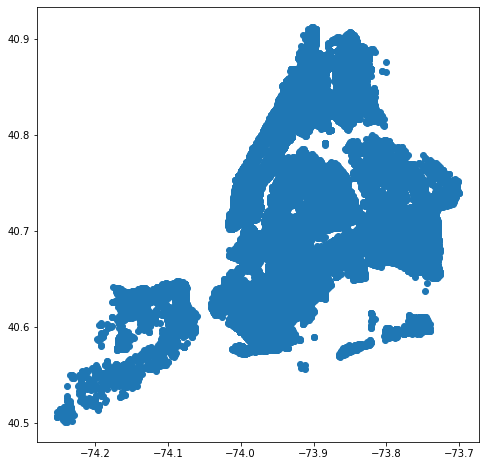

In [386]:
c_spatial.plot(figsize=(8,8))

## Section 2 -Exploratory analysis tasks (50 pts, 10 pts each part)

1. Visualize the time series of the total number of type 1 crimes for the whole city per day.
2. Visualize part 1 crimes grouped on a) borough level as a bar plot and b) zip code level as a heatmap normalized by population (per 100,000). Use quantiles scheme colormap.
3. Plot following bar plots: the total number of part 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.
4. Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)
5. Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough

### 1. time series plotting

In [387]:
# group total crimes by daily numbers
crimes_daily_num= c_spatial.groupby('CMPLNT_FR_DT')['CMPLNT_NUM'].count().reset_index()
crimes_daily_num

,CMPLNT_FR_DT,CMPLNT_NUM
0,2019-01-01,312
1,2019-01-02,201
2,2019-01-03,259
3,2019-01-04,260
4,2019-01-05,230
...,...,...
399,2020-10-10,1
400,2020-10-13,1
401,2020-10-16,1
402,2020-10-31,1


<AxesSubplot:xlabel='CMPLNT_FR_DT'>

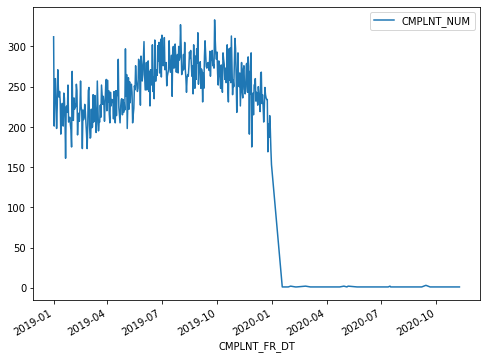

In [388]:
# plot as a time series
crimes_daily_num.plot(x='CMPLNT_FR_DT' , y = 'CMPLNT_NUM', use_index = True,figsize=(8,6))

### 2. plotting on borough and zip code level normalized by population

In [389]:
zips_new = zips[['ZIPCODE','PO_NAME','POPULATION','COUNTY','CTY_FIPS']].drop_duplicates()
zips_new.shape

(251, 5)

In [390]:
# group crime numbers by borough and normalize by their population (per 100,000). Population is given in the zips shapefile
zips_new_grp = zips_new.groupby(['COUNTY']).agg({'POPULATION':'sum'}).reset_index()
zips_new_grp

,COUNTY,POPULATION
0,Bronx,1422425.0
1,Kings,2515752.0
2,New York,1645976.0
3,Queens,2240517.0
4,Richmond,468220.0


In [391]:
def change_nm(row):
    if row['COUNTY'] == 'New York':
        return 'MANHATTAN'
    elif row['COUNTY'] == 'Kings':
        return 'BROOKLYN'
    elif row['COUNTY'] == 'Richmond':
        return 'STATEN ISLAND'
    elif row['COUNTY'] == 'Bronx':
        return 'BRONX'
    elif row['COUNTY'] == 'Queens':
        return 'QUEENS'
    else:
        return None

zips_new_grp['BORO_NM'] = zips_new_grp.apply(lambda row: change_nm(row), axis = 1)
zips_new_grp

,COUNTY,POPULATION,BORO_NM
0,Bronx,1422425.0,BRONX
1,Kings,2515752.0,BROOKLYN
2,New York,1645976.0,MANHATTAN
3,Queens,2240517.0,QUEENS
4,Richmond,468220.0,STATEN ISLAND


In [392]:
c_borough= c_spatial.groupby(['BORO_NM']).agg({'CMPLNT_NUM':'count'}).reset_index()
c_borough

,BORO_NM,CMPLNT_NUM
0,BRONX,18914
1,BROOKLYN,26337
2,MANHATTAN,25819
3,QUEENS,18018
4,STATEN ISLAND,2313


In [393]:
BORO_MERGE = c_borough.merge(zips_new_grp, how = 'left')

#Normalisation by population (per 100000)
BORO_MERGE['Normal_pop'] = (BORO_MERGE.CMPLNT_NUM/BORO_MERGE.POPULATION) *100000
BORO_MERGE

,BORO_NM,CMPLNT_NUM,COUNTY,POPULATION,Normal_pop
0,BRONX,18914,Bronx,1422425.0,1329.701039
1,BROOKLYN,26337,Kings,2515752.0,1046.883795
2,MANHATTAN,25819,New York,1645976.0,1568.613394
3,QUEENS,18018,Queens,2240517.0,804.189390
4,STATEN ISLAND,2313,Richmond,468220.0,493.998548


<AxesSubplot:title={'center':'Number of crimes per Borough normalize by their population'}, xlabel='BORO_NM'>

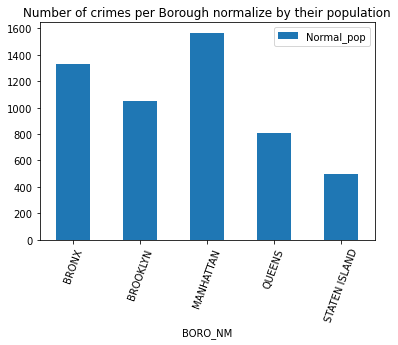

In [394]:
# plot as a bar plot
BORO_MERGE.plot.bar( x="BORO_NM", y="Normal_pop", rot=70, title='Number of crimes per Borough normalize by their population')

In [395]:
# now group by zip codes, normalize by their population

zips_zip = zips[['ZIPCODE','PO_NAME','POPULATION']].drop_duplicates()
zips_zip_1 = zips_zip.groupby(['ZIPCODE']).agg({'POPULATION':'sum'}).reset_index()
zips_zip_1

,ZIPCODE,POPULATION
0,00083,25.0
1,10001,22413.0
2,10002,81305.0
3,10003,55878.0
4,10004,2187.0
...,...,...
243,11691,60267.0
244,11692,18018.0
245,11693,11052.0
246,11694,20163.0


In [396]:
c_borough_zip= c_spatial.groupby(['ZIPCODE']).agg({'CMPLNT_NUM':'count'}).reset_index()
c_borough_zip

,ZIPCODE,CMPLNT_NUM
0,00083,68
1,10001,1506
2,10002,1221
3,10003,1095
4,10004,95
...,...,...
184,11691,774
185,11692,210
186,11693,17
187,11694,140


In [397]:
ZIP_MERGE = c_borough_zip.merge(zips_zip_1, how = 'left')

#Normalisation by population
ZIP_MERGE['Normal_pop'] = (ZIP_MERGE.CMPLNT_NUM/ZIP_MERGE.POPULATION) *100000
ZIP_MERGE

,ZIPCODE,CMPLNT_NUM,POPULATION,Normal_pop
0,00083,68,25.0,272000.000000
1,10001,1506,22413.0,6719.314683
2,10002,1221,81305.0,1501.752660
3,10003,1095,55878.0,1959.626329
4,10004,95,2187.0,4343.850023
...,...,...,...,...
184,11691,774,60267.0,1284.284932
185,11692,210,18018.0,1165.501166
186,11693,17,11052.0,153.818313
187,11694,140,20163.0,694.341120


<AxesSubplot:>

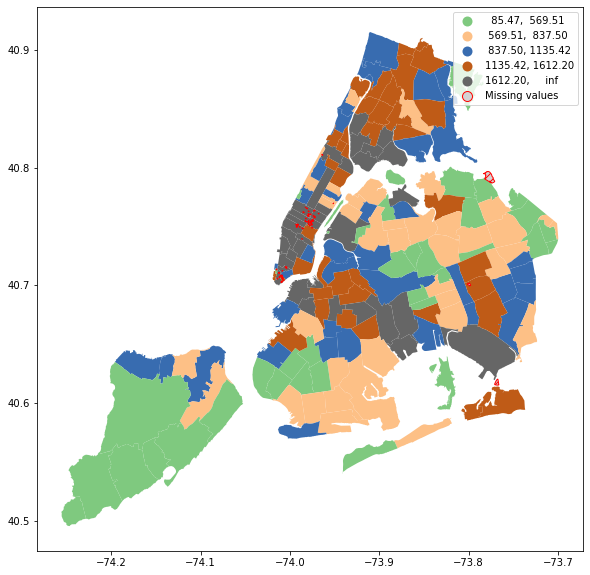

In [398]:
# plot as a heatmap with quantiles color scheme

ZIP_MERGE_1 = zips_1.merge(ZIP_MERGE, left_on='ZIPCODE',right_on='ZIPCODE', how = 'left')
ZIP_MERGE_1.plot(column='Normal_pop',
                 legend=True,
                 scheme = 'quantiles',
                 cmap='Accent',
                figsize=(15,10),
                 missing_kwds={
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values",
                },)

### 3. bar plot of total crimes vs a) months b) day of week and c) hour of day

<AxesSubplot:title={'center':'The total number of part 1 crimes by Month'}, xlabel='Month'>

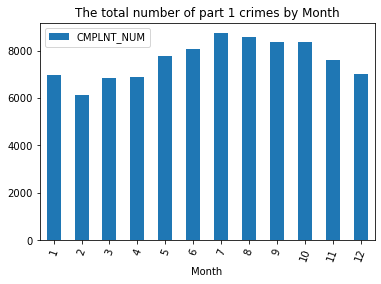

In [399]:
# code here
#Plot following bar plots: the total number of part 1 crimes by a) month  

#convert float into int
c_spatial['Month']=c_spatial['Month'].astype(int)
c_spatial['DOW']=c_spatial['DOW'].astype(int)
c_spatial['Hour']=c_spatial['Hour'].astype(int)

#groupby month
total_crimes_month= c_spatial.groupby(['Month']).agg({'CMPLNT_NUM':'count'}).reset_index()

# plot as a bar plot
total_crimes_month.plot.bar( x="Month", y="CMPLNT_NUM", rot=70, title='The total number of part 1 crimes by Month')

<AxesSubplot:title={'center':'The total number of part 1 crimes by Day of Week'}, xlabel='Day'>

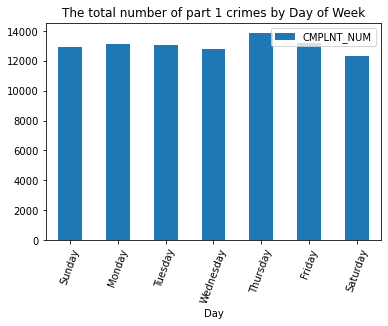

In [400]:
# b) day of week( use weekday names for labels)

#groupby day of week (DOW)
total_crimes_DOW= c_spatial.groupby(['DOW']).agg({'CMPLNT_NUM':'count'}).reset_index()
#new df for weekday names
weekday= {'Day':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
         'DOW1': [0,1,2,3,4,5,6]}
df = pd.DataFrame(weekday)
df.rename(columns={"index": "DOW1", "0": "weekday"})
# merge df 
total_crimes_DOW1 =total_crimes_DOW.merge(df, left_on='DOW', right_on='DOW1')
total_crimes_DOW1

#plot complain number and weekday name
# plot as a bar plot
total_crimes_DOW1.plot.bar( x="Day", y="CMPLNT_NUM", rot=70, title='The total number of part 1 crimes by Day of Week')

<AxesSubplot:title={'center':'The total number of part 1 crimes hour of day.'}, xlabel='Hour'>

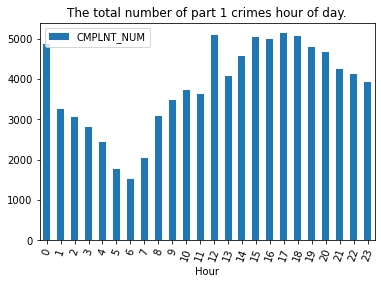

In [401]:
# c) hour of day.
#groupby day of Hour
total_crimes_hour= c_spatial.groupby(['Hour']).agg({'CMPLNT_NUM':'count'}).reset_index()
# plot as a bar plot
total_crimes_hour.plot.bar( x="Hour", y="CMPLNT_NUM", rot=70, title='The total number of part 1 crimes hour of day.')

### 4. Felony assault vs grand larceny by a) day of week b) hour of day

In [402]:
#Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny 
#normalized per 100,000 population, comparing these two types of crime on the same bar plots

# filter data for above crime types
crime_FA_GL= c_spatial.loc[(c_spatial['OFNS_DESC']=='FELONY ASSAULT')|(c_spatial['OFNS_DESC']=='GRAND LARCENY')]
crime_FA_GL

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,Date_Time,Date,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
227,259948697,2019-10-12,00:01:00,GRAND LARCENY,MANHATTAN,NaN,40.722027,-73.983446,2019-10-12 00:01:00,2019-10-12,...,New York,61455.0,1.590352e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
1116,533911393,2019-11-19,00:01:00,GRAND LARCENY,MANHATTAN,NaN,40.720813,-73.978136,2019-11-19 00:01:00,2019-11-19,...,New York,61455.0,1.590352e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
1996,405855157,2019-12-31,18:15:00,FELONY ASSAULT,MANHATTAN,NaN,40.723997,-73.975815,2019-12-31 18:15:00,2019-12-31,...,New York,61455.0,1.590352e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
3465,501022114,2019-12-24,17:10:00,GRAND LARCENY,MANHATTAN,NaN,40.726521,-73.984639,2019-12-24 17:10:00,2019-12-24,...,New York,61455.0,1.590352e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
3872,598306623,2019-12-31,20:20:00,FELONY ASSAULT,MANHATTAN,NaN,40.720505,-73.976026,2019-12-31 20:20:00,2019-12-31,...,New York,61455.0,1.590352e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90963,135721055,2019-10-22,12:40:00,FELONY ASSAULT,QUEENS,NaN,40.652262,-73.760509,2019-10-22 12:40:00,2019-10-22,...,Jamaica,16.0,1.999137e+08,NY,Queens,36,081,http://www.usps.com/,0.0,0.0
119481,574414703,2019-08-31,15:00:00,GRAND LARCENY,BRONX,NaN,40.865623,-73.801091,2019-08-31 15:00:00,2019-08-31,...,Bronx,4438.0,7.625748e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
167810,644827635,2019-08-25,17:30:00,FELONY ASSAULT,BRONX,NaN,40.866326,-73.806150,2019-08-25 17:30:00,2019-08-25,...,Bronx,4438.0,7.625748e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
246910,435666381,2019-06-22,10:26:00,GRAND LARCENY,BRONX,NaN,40.866326,-73.806150,2019-06-22 10:26:00,2019-06-22,...,Bronx,4438.0,7.625748e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0


In [403]:
# group the numbers and normalize by total city population (per 100,000)
total_city_population = zips_new_grp.POPULATION.sum()
total_city_population

8292890.0

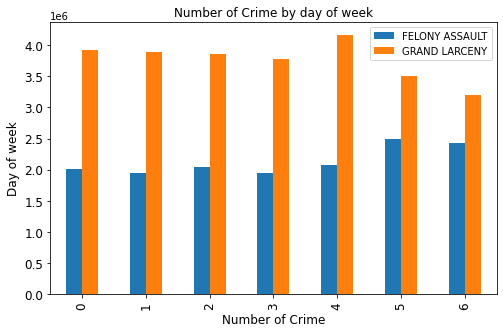

In [404]:
#group by Day of week
crime_FA_GL_DOW= crime_FA_GL.groupby(['DOW','OFNS_DESC']).agg({'CMPLNT_NUM':'count','POPULATION':'sum'}).reset_index()

#Normalise by total city population
crime_FA_GL_DOW['Normalised']= round((crime_FA_GL_DOW['POPULATION']/total_city_population)*100000,3)
crime_FA_GL_DOW

#seperate the dataframe based on crime category
crime_FA_DOW = crime_FA_GL_DOW.loc[crime_FA_GL_DOW['OFNS_DESC'] =='FELONY ASSAULT']
crime_GL_DOW = crime_FA_GL_DOW.loc[crime_FA_GL_DOW['OFNS_DESC'] =='GRAND LARCENY']

#merge
crime_FA_GL_DOW1 =crime_FA_DOW.merge(crime_GL_DOW, left_on='DOW', right_on='DOW')
crime_FA_GL_DOW1=crime_FA_GL_DOW1.rename(columns={"Normalised_x": "FELONY ASSAULT", "Normalised_y": "GRAND LARCENY"})
crime_FA_GL_DOW1

# plot bar plot: one for day of week 
# plot should have comparison of the two type of crime numbers (normalized) by weekday 
ax = crime_FA_GL_DOW1[['FELONY ASSAULT','GRAND LARCENY']].plot(kind='bar', title ="Number of Crime by day of week", figsize=(8, 5), legend=True, fontsize=12)
ax.set_xlabel("Number of Crime", fontsize=12)
ax.set_ylabel("Day of week", fontsize=12)
plt.show()

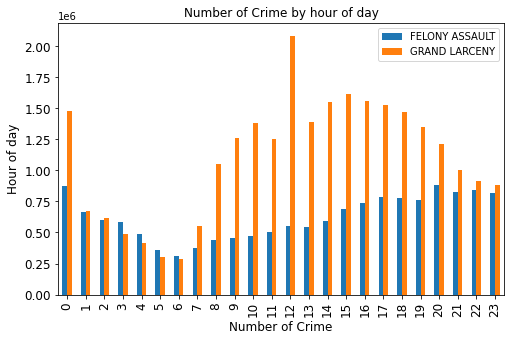

In [405]:
#groupby Hour of day
crime_FA_GL_hr= crime_FA_GL.groupby(['Hour','OFNS_DESC']).agg({'CMPLNT_NUM':'count','POPULATION':'sum',}).reset_index()
crime_FA_GL_hr

#Normalise by total city population
crime_FA_GL_hr['Normalised']= round((crime_FA_GL_hr['POPULATION']/total_city_population)*100000,3)

#seperate the dataframe based on crime category
crime_FA_hr = crime_FA_GL_hr.loc[crime_FA_GL_hr['OFNS_DESC'] =='FELONY ASSAULT']
crime_GL_hr = crime_FA_GL_hr.loc[crime_FA_GL_hr['OFNS_DESC'] =='GRAND LARCENY']

#merge
crime_FA_GL_hr1 =crime_FA_hr.merge(crime_GL_hr, left_on='Hour', right_on='Hour')
crime_FA_GL_hr1=crime_FA_GL_hr1.rename(columns={"Normalised_x": "FELONY ASSAULT", "Normalised_y": "GRAND LARCENY"})
crime_FA_GL_hr1

# plot bar plot: one for hour of day
# plot should have comparison of the two type of crime numbers (normalized) hour respectively
ax = crime_FA_GL_hr1[['FELONY ASSAULT','GRAND LARCENY']].plot(kind='bar', title ="Number of Crime by hour of day", figsize=(8, 5), legend=True, fontsize=12)
ax.set_xlabel("Number of Crime", fontsize=12)
ax.set_ylabel("Hour of day", fontsize=12)
plt.show()

### 5. comparing the %% decomposition of crime within different boroughs

### % distribution of crime types by borough in pie charts 

for matplotlib pie charts documentation: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

MANHATTAN


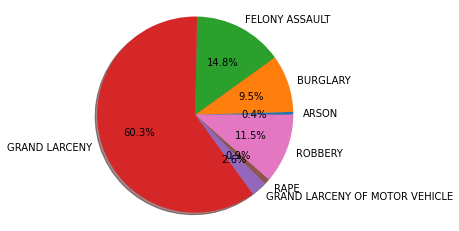

BRONX


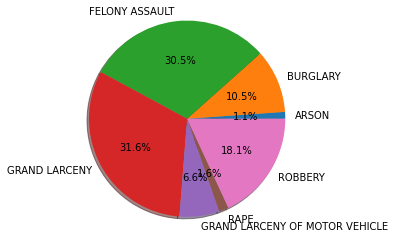

BROOKLYN


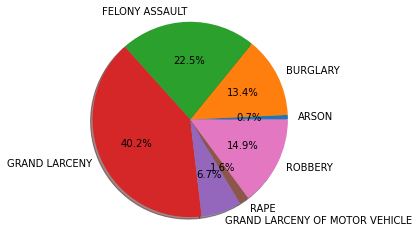

QUEENS


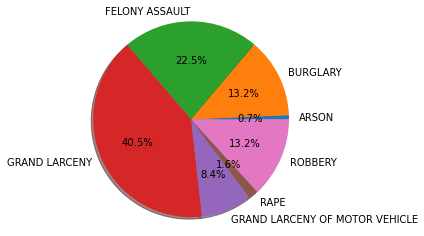

STATEN ISLAND


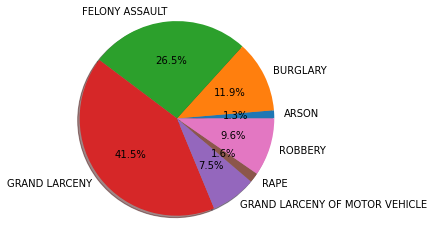

In [406]:
# plot 5 pie charts for each borough depicting % of each crime type within type 1 crimes
for boro in c_spatial.BORO_NM.unique():
    print(boro)
    temp = c_spatial.loc[c_spatial['BORO_NM'] == boro,['OFNS_DESC']]
    temp1 = temp.groupby('OFNS_DESC').agg({'OFNS_DESC':'count'})\
                                .rename(columns={'OFNS_DESC':'COUNT'})\
                                .reset_index()
    temp1['D'] = 1
    temp1['Tot_sum'] = temp1.groupby('D')['COUNT'].transform('sum')
    temp1['Perct'] =  (temp1['COUNT']/temp1['Tot_sum'])*100
    temp1

    fig1, ax1 = plt.subplots()
    ax1.pie(temp1['Perct'], 
        labels=temp1['OFNS_DESC'], 
        autopct='%1.1f%%',
        shadow=True)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
            
    # complete this code here

## Section 3 - Hypothesis testing tasks (18 pts, 9 pts for each part)

1. Plot the distribution (density plot) of daily number of total type 1 crimes for 2019.
Test the hypothesis if the distribution follows normal distribution.

2. Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? 

### 1. plotting distributions and normality test

In [407]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

In [408]:
# group type 1 crime numbers per day for 2019
c_spatial1=c_spatial.loc[c_spatial['Year']== 2019]
crime_per_day_2019=c_spatial1.groupby('CMPLNT_FR_DT').agg({'CMPLNT_NUM':'count'})
crime_per_day_2019.reset_index()

,CMPLNT_FR_DT,CMPLNT_NUM
0,2019-01-01,312
1,2019-01-02,201
2,2019-01-03,259
3,2019-01-04,260
4,2019-01-05,230
...,...,...
360,2019-12-27,187
361,2019-12-28,214
362,2019-12-29,198
363,2019-12-30,172


Mean = 250.29
Standard deviation = 32.92
1 percentile = 172.64
5 percentile = 198.00
25 percentile = 227.00
50 percentile = 251.00
75 percentile = 275.00
95 percentile = 302.00
99 percentile = 313.36


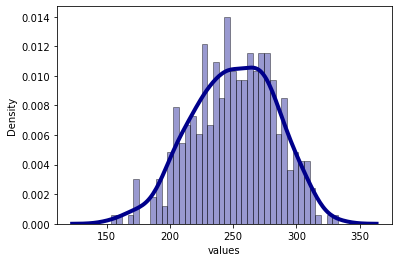

In [409]:
# plot the distribution (density plot)
distribution_analysis(crime_per_day_2019.CMPLNT_NUM, bins=40, vis_means = False)

Mean = 250.29
Standard deviation = 32.92
1 percentile = 172.64
5 percentile = 198.00
25 percentile = 227.00
50 percentile = 251.00
75 percentile = 275.00
95 percentile = 302.00
99 percentile = 313.36


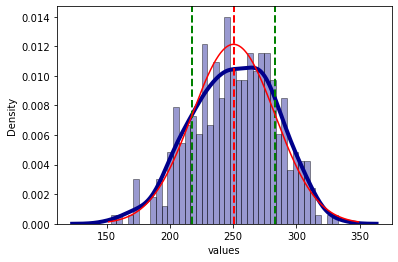

In [410]:
#indeed if we now fit the normal distribution the fit is not going to be perfect
distribution_analysis(crime_per_day_2019.CMPLNT_NUM, fit_distribution='normal', bins=40);

In [411]:
# normality test
#The null hypothesis for this test is that the data are normally distributed
from scipy.stats import shapiro
stat, p = shapiro(crime_per_day_2019.CMPLNT_NUM)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.993, p=0.109
Sample looks Gaussian (fail to reject H0)


In [412]:
#Test the hypothesis if the distribution follows normal distribution.
#Above Gaussian's normality test fails to reject the null hypothesis

### 2. weekdays vs weekend distribution

In [413]:
#Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) 
#and perform 
#a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, 
#b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. 
#Can you reject either hypothesis at the 10% significance level?

Mean = 3.04
Standard deviation = 0.40
1 percentile = 2.06
5 percentile = 2.40
25 percentile = 2.76
50 percentile = 3.05
75 percentile = 3.33
95 percentile = 3.64
99 percentile = 3.80


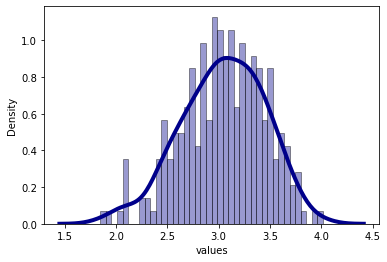

In [414]:
# create dataframes for weekdays
c_spatial1_weekDays= c_spatial1.loc[(c_spatial1['DOW'] != 6) & (c_spatial1['DOW'] != 5) ]

# group daily numbers for weekdays 
c_spatial1_weekDays1=c_spatial1_weekDays.groupby('CMPLNT_FR_DT').agg({'CMPLNT_NUM':'count'}).rename(columns={'CMPLNT_NUM':'CMPLNT_COUNT'}).reset_index()

#Normalise by Population
c_spatial1_weekDays1['Normalised']= (c_spatial1_weekDays1.CMPLNT_COUNT/total_city_population)*100000
c_spatial1_weekDays1

# plot distribution (density plot)
distribution_analysis(c_spatial1_weekDays1.Normalised, bins=40, vis_means = False)

Mean = 2.96
Standard deviation = 0.38
1 percentile = 2.29
5 percentile = 2.39
25 percentile = 2.69
50 percentile = 2.93
75 percentile = 3.27
95 percentile = 3.61
99 percentile = 3.73


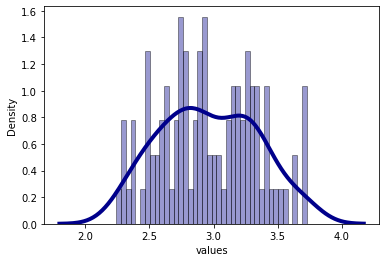

In [415]:
# create dataframes for weekends
c_spatial1_weekEnds= c_spatial1.loc[(c_spatial1['DOW'] == 6) | (c_spatial1['DOW'] == 5) ]

# group daily numbers for weekdays 
c_spatial1_weekEnds1=c_spatial1_weekEnds.groupby('CMPLNT_FR_DT').agg({'CMPLNT_NUM':'count'}).rename(columns={'CMPLNT_NUM':'CMPLNT_COUNT'}).reset_index()

#Normalise by Population
c_spatial1_weekEnds1['Normalised']= (c_spatial1_weekEnds1.CMPLNT_COUNT/total_city_population)*100000
c_spatial1_weekEnds1

# plot distribution (density plot)
distribution_analysis(c_spatial1_weekEnds1.Normalised, bins=40, vis_means = False)

In [416]:
#a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same
# t-test
stats.ttest_ind(c_spatial1_weekDays1['Normalised'],c_spatial1_weekEnds1['Normalised'])

Ttest_indResult(statistic=1.6914346755235437, pvalue=0.09161207150699031)

In [417]:
#b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution.
# k-s test
stats.ks_2samp(c_spatial1_weekDays1['Normalised'],c_spatial1_weekEnds1['Normalised'])

KstestResult(statistic=0.14187297376952548, pvalue=0.08910185374425206)

In [418]:
#Can you reject either hypothesis at the 10% significance level?
#Yes. we can reject the null hypothesis that average daily crime over weekdays and weekends is the same at 10% significance level because p-values are less than 0.010.